In [ ]:
import pandas as pd
df = pd.read_csv("top5-players.csv")
df.shape
df.isna().sum()

(2852, 37)
Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64


In [55]:
import pandas as pd
df = pd.read_csv("top5-players.csv")
df = df.drop_duplicates()
df = df.dropna()
df.to_csv("top5playersclean.csv", index=False)



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("top5playersclean.csv")

df["goals_per_match"]   = np.where(df["MP"] > 0, df["Gls"] / df["MP"], np.nan)
df["assists_per_match"] = np.where(df["MP"] > 0, df["Ast"] / df["MP"], np.nan)
df["minutes_per_match"] = np.where(df["MP"] > 0, df["Min"] / df["MP"], np.nan)

df.shape
df[["goals_per_match","assists_per_match","minutes_per_match"]].describe().T

df.to_csv("top5playersclean.csv", index=False)


Shape: (2846, 40)
                    count       mean        std  min     25%        50%  \
goals_per_match    2846.0   0.069704   0.117810  0.0   0.000   0.000000   
assists_per_match  2846.0   0.050034   0.079439  0.0   0.000   0.000000   
minutes_per_match  2846.0  54.387091  26.098311  1.0  34.125  58.417308   

                         75%     max  
goals_per_match     0.100000   1.125  
assists_per_match   0.078947   1.000  
minutes_per_match  76.871538  90.000  
KPIs ajoutés et fichier sauvegardé


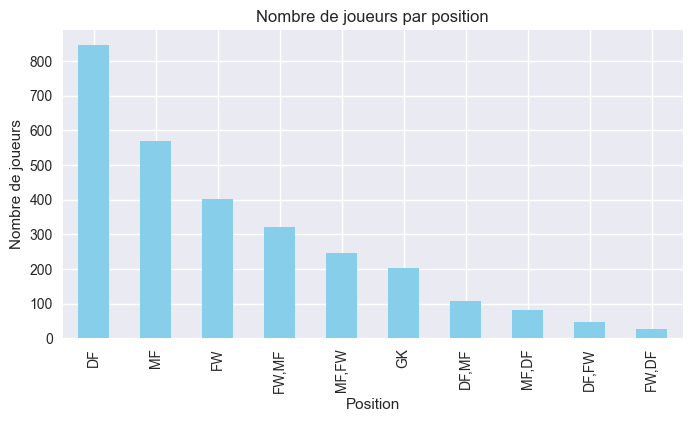

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("top5playersclean.csv")


df["Pos"].value_counts().plot(kind="bar", color="skyblue", figsize=(8,4))
plt.title("Nombre de joueurs par position")
plt.xlabel("Position")
plt.ylabel("Nombre de joueurs")
plt.show()

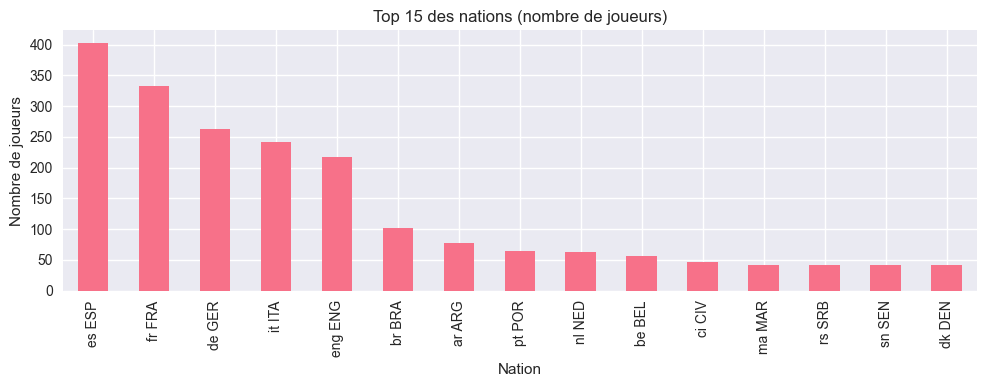

In [58]:
import matplotlib.pyplot as plt
topn = df["Nation"].value_counts().head(15)

plt.figure(figsize=(10,4))
topn.plot(kind="bar")
plt.title("Top 15 des nations (nombre de joueurs)")
plt.xlabel("Nation")
plt.ylabel("Nombre de joueurs")
plt.tight_layout()
plt.show()


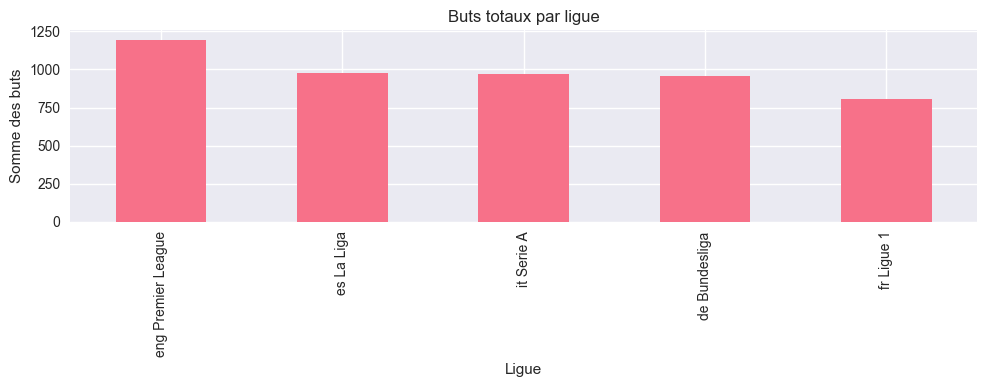

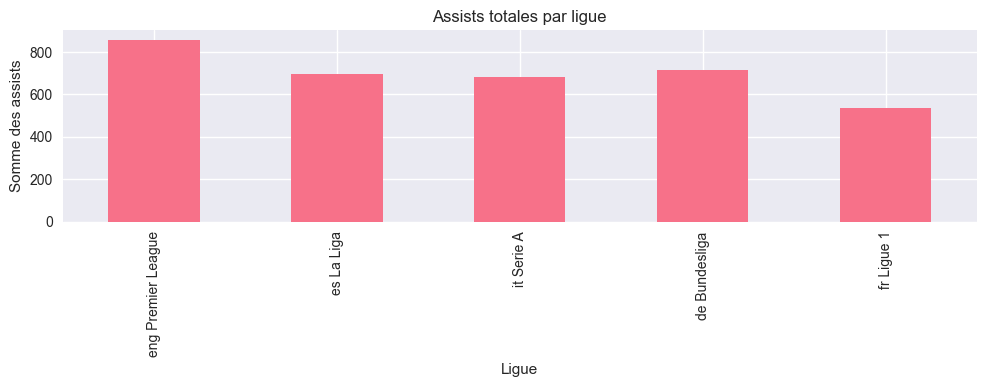

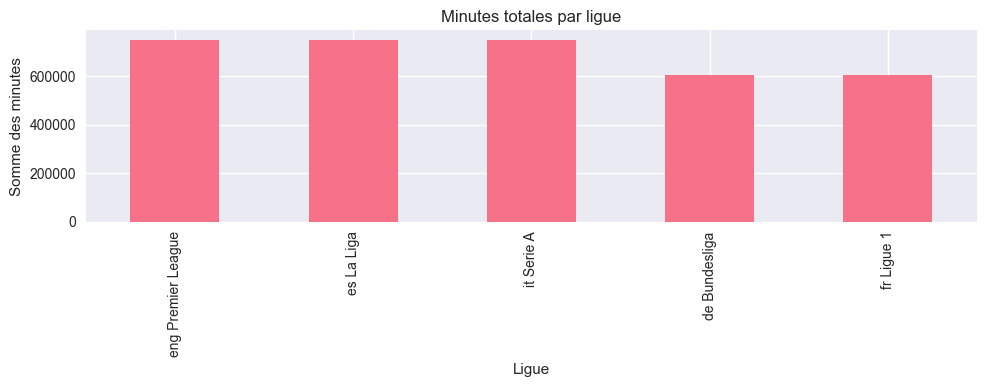

In [59]:
import matplotlib.pyplot as plt
by_league = df.groupby("Comp")[["Gls","Ast","Min"]].sum().sort_values("Gls", ascending=False)

plt.figure(figsize=(10,4))
by_league["Gls"].plot(kind="bar")
plt.title("Buts totaux par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des buts")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
by_league["Ast"].plot(kind="bar")
plt.title("Assists totales par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des assists")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
by_league["Min"].plot(kind="bar")
plt.title("Minutes totales par ligue")
plt.xlabel("Ligue")
plt.ylabel("Somme des minutes")
plt.tight_layout()
plt.show()


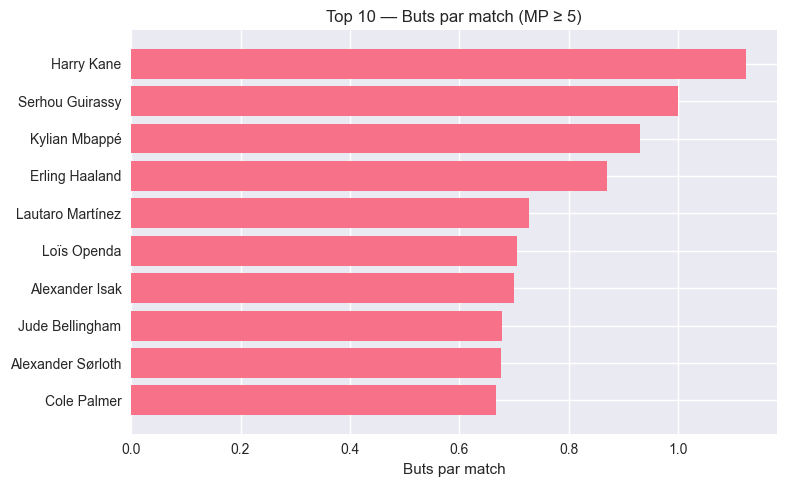

In [60]:
import numpy as np, matplotlib.pyplot as plt

subset = df[df["MP"] >= 5].copy()  
top = subset.sort_values("goals_per_match", ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top["Player"], top["goals_per_match"])
plt.title("Top 10 — Buts par match (MP ≥ 5)")
plt.xlabel("Buts par match")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


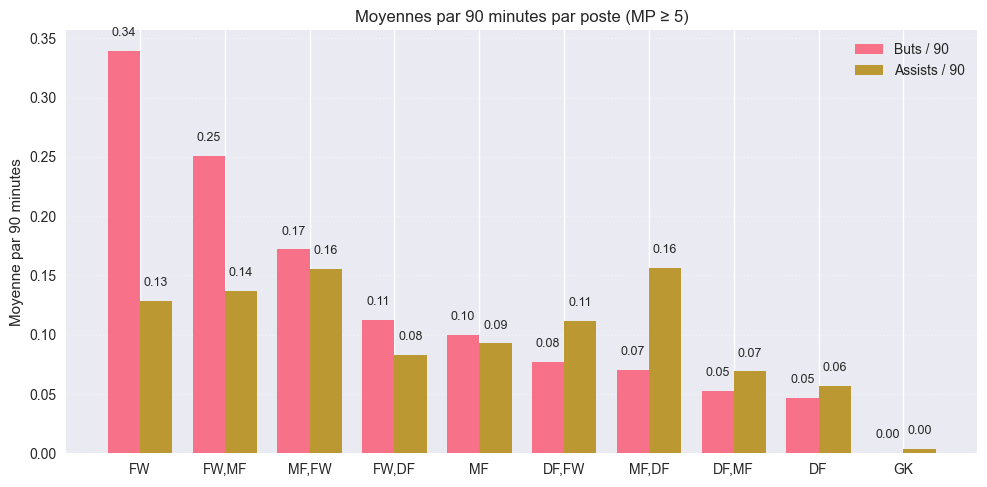

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("top5playersclean.csv")

data = df.loc[df["MP"] >= 5, ["Pos", "Gls_90", "Ast_90"]].dropna()
means = data.groupby("Pos")[ ["Gls_90", "Ast_90"] ].mean().sort_values("Gls_90", ascending=False)

pos_order = means.index.tolist()
x = np.arange(len(pos_order))
width = 0.38

plt.rcParams.update({"font.size": 11})
fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x - width/2, means["Gls_90"].values, width, label="Buts / 90")
b2 = ax.bar(x + width/2, means["Ast_90"].values, width, label="Assists / 90")

for bars in (b1, b2):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h:.2f}", ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(pos_order)
ax.set_ylabel("Moyenne par 90 minutes")
ax.set_title("Moyennes par 90 minutes par poste (MP ≥ 5)")
ax.grid(axis="y", linestyle=":", alpha=0.4)
ax.legend()
fig.tight_layout()

os.makedirs("./figs", exist_ok=True)
fig.savefig("./figs/bar_per90_by_pos.png", dpi=150, bbox_inches="tight")
plt.show()


In [79]:
df_3d = df[df['MP'] >= 5].copy()

fig_3d = go.Figure(data=go.Scatter3d(
    x=df_3d['Gls'],
    y=df_3d['Ast'],
    z=df_3d['Min'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_3d['MP'],
        colorscale='viridis',
        opacity=0.8,
        colorbar=dict(title="Matchs Joués")
    ),
    text=df_3d['Player'],
    hovertemplate='<b>%{text}</b><br>' +
                 'Buts: %{x}<br>' +
                 'Assists: %{y}<br>' +
                 'Minutes: %{z}<br>' +
                 '<extra></extra>'
))

fig_3d.update_layout(
    title="Relation 3D : Buts vs Assists vs Minutes",
    scene=dict(
        xaxis_title='Buts',
        yaxis_title='Assists',
        zaxis_title='Minutes'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font_size=12
)

fig_3d.show()

In [81]:
df['age_group'] = pd.cut(df['Age'], 
                        bins=[0, 22, 25, 28, 32, 50], 
                        labels=['18-22', '23-25', '26-28', '29-32', '33+'])

age_stats = df.groupby('age_group')[['Gls', 'Ast', 'Min', 'MP']].mean()

fig_age = go.Figure()

fig_age.add_trace(go.Bar(
    name='Buts moyens',
    x=age_stats.index,
    y=age_stats['Gls'],
    marker_color='#e74c3c',
    opacity=0.8
))

fig_age.add_trace(go.Bar(
    name='Assists moyens',
    x=age_stats.index,
    y=age_stats['Ast'],
    marker_color='#3498db',
    opacity=0.8
))

fig_age.add_trace(go.Bar(
    name='Minutes moyennes (x10)',
    x=age_stats.index,
    y=age_stats['Min']/10,
    marker_color='#2ecc71',
    opacity=0.8
))

fig_age.update_layout(
    title="Performance Moyenne par Tranche d'Âge",
    xaxis_title="Tranche d'âge",
    yaxis_title="Valeurs moyennes",
    barmode='group',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font_size=12
)

fig_age.show()


/var/folders/q0/866w7td97pl_074hlm_09bv00000gn/T/ipykernel_3398/4235300425.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/q0/866w7td97pl_074hlm_09bv00000gn/T/ipykernel_3398/483655231.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



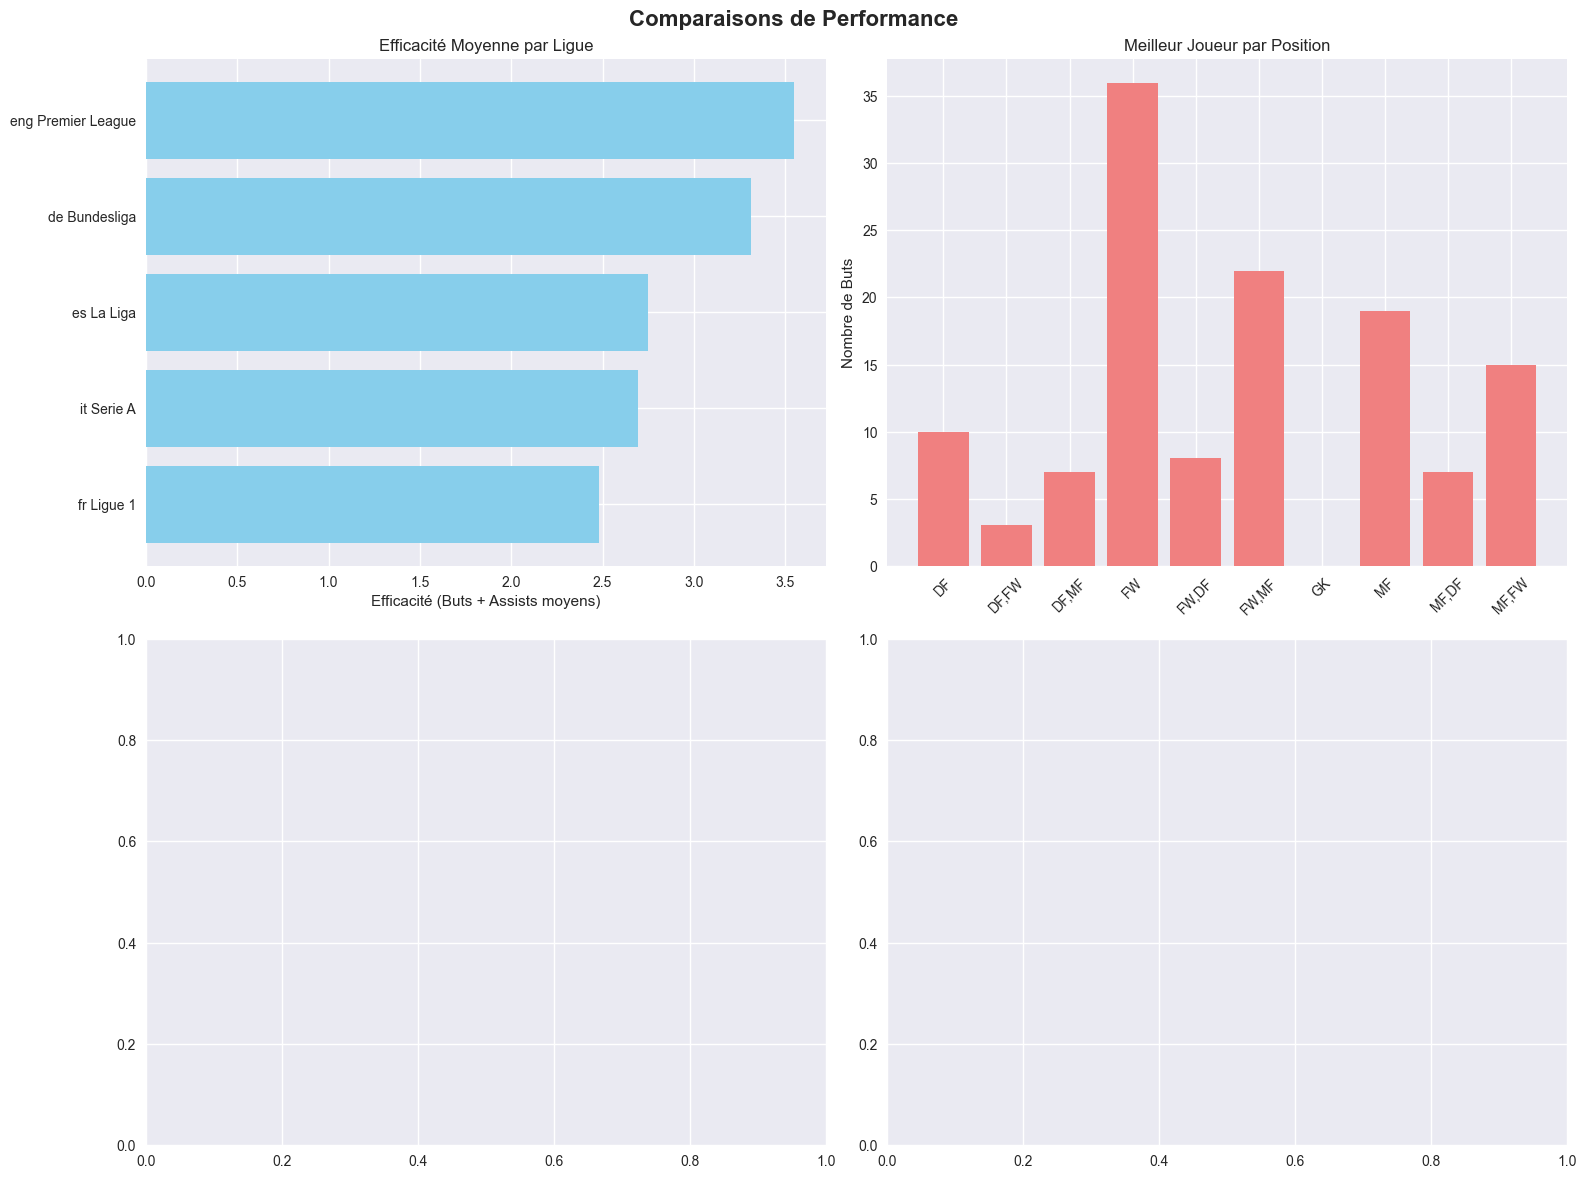

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaisons de Performance', fontsize=16, fontweight='bold')

league_efficiency = df.groupby('Comp').agg({
    'Gls': 'mean',
    'Ast': 'mean',
    'Player': 'count'
}).reset_index()
league_efficiency['efficiency'] = league_efficiency['Gls'] + league_efficiency['Ast']
league_efficiency = league_efficiency.sort_values('efficiency', ascending=True)

axes[0,0].barh(league_efficiency['Comp'], league_efficiency['efficiency'], color='skyblue')
axes[0,0].set_title('Efficacité Moyenne par Ligue')
axes[0,0].set_xlabel('Efficacité (Buts + Assists moyens)')

top_by_pos = df.groupby('Pos').apply(lambda x: x.nlargest(1, 'Gls')).reset_index(drop=True)
axes[0,1].bar(top_by_pos['Pos'], top_by_pos['Gls'], color='lightcoral')
axes[0,1].set_title('Meilleur Joueur par Position')
axes[0,1].set_ylabel('Nombre de Buts')
axes[0,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [89]:
total_players = len(df)
total_goals = df['Gls'].sum()
total_assists = df['Ast'].sum()
avg_goals = df['Gls'].mean()
avg_assists = df['Ast'].mean()
top_scorer = df.loc[df['Gls'].idxmax(), 'Player']
top_assister = df.loc[df['Ast'].idxmax(), 'Player']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Tableau de Bord Final - Synthèse des Performances', fontsize=16, fontweight='bold')

top_scorers = df.nlargest(10, 'Gls')
axes[0].barh(range(len(top_scorers)), top_scorers['Gls'], color='red', alpha=0.7)
axes[0].set_yticks(range(len(top_scorers)))
axes[0].set_yticklabels(top_scorers['Player'], fontsize=8)
axes[0].set_title('Top 10 Buteurs')
axes[0].set_xlabel('Nombre de Buts')
axes[0].invert_yaxis()

top_assisters = df.nlargest(10, 'Ast')
axes[1].barh(range(len(top_assisters)), top_assisters['Ast'], color='blue', alpha=0.7)
axes[1].set_yticks(range(len(top_assisters)))
axes[1].set_yticklabels(top_assisters['Player'], fontsize=8)
axes[1].set_title('Top 10 Passeurs')
axes[1].set_xlabel(&quot;Nombre d'Assists&quot;)
axes[1].invert_yaxis()

league_counts = df['Comp'].value_counts()
axes[2].pie(league_counts.values, labels=league_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Répartition par Ligue')

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 25) (3558026956.py, line 25)